<div class="alert alert-block alert-danger">

##  By:   Dalciana B. Waller


# Case: Marketing campaign optimization  


# Part 2) Customer Segmentation proposal


It is crucial to understand customer behavior and categorize customers based on their demography and buying behavior.

This is a critical aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

In [ ]:
"""

Clustering is an unsupervised machine learning technique, 
where there are no defined dependent and independent variables. 

The patterns in the data are used to identify / group similar observations.

The standard k-means algorithm isn't directly applicable to categorical data, for various reasons.
The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful. As someone put it, "The fact a snake possesses neither wheels nor legs allows us to say nothing about the relative value of wheels and legs." (from here)

""" 

In [1]:
import numpy as np 
import pandas as pd 
from numpy.random import rand
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

dataf= pd.read_excel("ml_project1_data_df4.xlsx")

dataf.head()


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
0,1,2174,1954,Graduation,Single,46344.000000,1,1,38,11,...,2,5,0,0,0,0,0,0,0,2237
1,3,6182,1984,Graduation,Together,26646.000000,1,0,26,11,...,4,6,0,0,0,0,0,0,0,2263
2,7,6177,1985,PhD,Married,33454.000000,1,0,32,76,...,4,8,0,0,0,0,0,0,0,2541
3,8,4855,1974,PhD,Together,30351.000000,1,0,19,14,...,2,9,0,0,0,0,0,0,1,2512
4,10,1994,1983,Graduation,Married,30354.292851,1,0,11,5,...,2,7,0,0,0,0,0,0,0,2350


In [17]:
dataf= pd.read_excel("ml_project1_data_df4.xlsx",index_col=[0])

#dataf=dataf.drop(0, axis=1)
dataf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
1,2174,1954,Graduation,Single,46344.000000,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,2237
3,6182,1984,Graduation,Together,26646.000000,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,2263
7,6177,1985,PhD,Married,33454.000000,1,0,32,76,10,...,4,8,0,0,0,0,0,0,0,2541
8,4855,1974,PhD,Together,30351.000000,1,0,19,14,0,...,2,9,0,0,0,0,0,0,1,2512
10,1994,1983,Graduation,Married,30354.292851,1,0,11,5,5,...,2,7,0,0,0,0,0,0,0,2350


In [18]:
"""
Proposal: user  standard k-means algorithm. 
It isn't directly applicable to categorical data
""" 

"""
According to feature engineering, Part 1, qe have the following 
"""
dataf.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Days_Customer'],
      dtype='object')

In [40]:
X1 = dataf.drop(["ID", "Marital_Status", "Education", "Response"], axis=1) #independent columns
#X1 = dataf.drop(["ID", "Marital_Status", "Education"], axis=1) #independent columns
X1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Days_Customer
1,1954,46344.000000,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,2237
3,1984,26646.000000,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,2263
7,1985,33454.000000,1,0,32,76,10,56,3,1,...,0,4,8,0,0,0,0,0,0,2541
8,1974,30351.000000,1,0,19,14,0,24,3,3,...,0,2,9,0,0,0,0,0,0,2512
10,1983,30354.292851,1,0,11,5,5,6,0,2,...,0,2,7,0,0,0,0,0,0,2350


In [41]:

Feat_selec= [ 'Recency',  'AcceptedCmp3','Days_Customer', 
 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumWebVisitsMonth',
 'NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases','Response']

X_feat_selec= [ 'Recency',  'AcceptedCmp3','Days_Customer', 
 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumWebVisitsMonth',
 'NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases']

### Number of clusters definition

Text(0, 0.5, 'wcss')

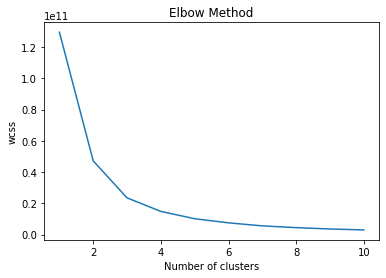

In [42]:


""" Elbow method:  to find the optimum number of clusters
Itsimply tells the optimal cluster number for optimal inertia.

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.
The steps can be summarized in the below steps:
Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
For each K, calculate the total within-cluster sum of square (WCSS).
Plot the curve of WCSS vs the number of clusters K.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
"""

X=X1
#algo 1
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')





In [43]:
# cost function
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 129488587395.43282
k: 2  cost: 47105082757.33227
k: 3  cost: 23455841001.33605
k: 4  cost: 14784894742.417988
k: 5  cost: 10089181658.267801
k: 6  cost: 7468500496.794739
k: 7  cost: 5528295296.096815
k: 8  cost: 4398074881.221876
k: 9  cost: 3537433125.989403
k: 10  cost: 2938753570.9156137



In [44]:
# WE are going to check 4 clusters

##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)


In [36]:
type(y_means)

numpy.ndarray

In [38]:
type(X)

pandas.core.frame.DataFrame

In [56]:
X1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Days_Customer
1,1954,46344.000000,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,2237
3,1984,26646.000000,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,2263
7,1985,33454.000000,1,0,32,76,10,56,3,1,...,0,4,8,0,0,0,0,0,0,2541
8,1974,30351.000000,1,0,19,14,0,24,3,3,...,0,2,9,0,0,0,0,0,0,2512
10,1983,30354.292851,1,0,11,5,5,6,0,2,...,0,2,7,0,0,0,0,0,0,2350


In [61]:
X_columns=X1.columns

for j in range (0,len(X_columns)):
    print("col %i   :  %s" %(j, X_columns[j])) 

col 0   :  Year_Birth
col 1   :  Income
col 2   :  Kidhome
col 3   :  Teenhome
col 4   :  Recency
col 5   :  MntWines
col 6   :  MntFruits
col 7   :  MntMeatProducts
col 8   :  MntFishProducts
col 9   :  MntSweetProducts
col 10   :  MntGoldProds
col 11   :  NumDealsPurchases
col 12   :  NumWebPurchases
col 13   :  NumCatalogPurchases
col 14   :  NumStorePurchases
col 15   :  NumWebVisitsMonth
col 16   :  AcceptedCmp3
col 17   :  AcceptedCmp4
col 18   :  AcceptedCmp5
col 19   :  AcceptedCmp1
col 20   :  AcceptedCmp2
col 21   :  Complain
col 22   :  Days_Customer


In [49]:
# X =  StandardScaler().fit_transform(X)

# Lets- transform x into an array in order to plot
X = X1.iloc[:, :].values
X

array([[1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.2370e+03],
       [1.9840e+03, 2.6646e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.2630e+03],
       [1.9850e+03, 3.3454e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.5410e+03],
       ...,
       [1.9860e+03, 2.6816e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.8050e+03],
       [1.9740e+03, 3.4421e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.4870e+03],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.7460e+03]])

In [69]:
X1.iloc[:, 1]

1       46344.000000
3       26646.000000
7       33454.000000
8       30351.000000
10      30354.292851
            ...     
2229    24434.000000
2230    11012.000000
2232    26816.000000
2234    34421.000000
2239    52869.000000
Name: Income, Length: 932, dtype: float64

 ## Cluster visualisation

In [123]:
def func_plot_cluster_k4(i,j):
    #Visualizing the clusters for k=4
    plt.scatter( X[y_means==0,i],  
                 X[y_means==0,j],
                s=50, c='purple',label='Cluster1')


    plt.scatter( X[y_means==1,i],   
                X[y_means==1,j],s=50, 
                c='blue',
                label='Cluster2')

    plt.scatter( X[y_means==2,i],
                X[y_means==2,j],
                s=50, c='green',
                label='Cluster3')

    plt.scatter( X[y_means==3,i],
                X[y_means==3,j],
                s=50, 
                c='cyan',
                label='Cluster4')

    plt.scatter(km4.cluster_centers_[:,i],
                km4.cluster_centers_[:,j],
                s=200,
                marker='s',
                c='red', 
                alpha=0.7, 
                label='Centroids')

    plt.title('Customer segments')

    plt.xlabel('%s' %X_columns[i])
    plt.ylabel('%s' %X_columns[j])
    plt.legend()
    plt.show()

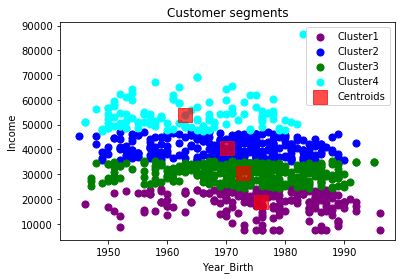

In [124]:
func_plot_cluster_k4(0,1)

In [148]:
X_columns=X1.columns

X_feat_selec_index=[]

for j in range (0,len(X_columns)):
    if X_columns[j] in X_feat_selec: 
        print("col %i   :  %s" %(j, X_columns[j])) 
        #X_feat_selec_index = X_feat_selec_index.append(j)

col 4   :  Recency
col 6   :  MntFruits
col 7   :  MntMeatProducts
col 9   :  MntSweetProducts
col 10   :  MntGoldProds
col 12   :  NumWebPurchases
col 13   :  NumCatalogPurchases
col 14   :  NumStorePurchases
col 15   :  NumWebVisitsMonth
col 16   :  AcceptedCmp3
col 22   :  Days_Customer


In [150]:

X_feat_selec_index=[4,6,7,9,10,12,13,14,15,16,22]

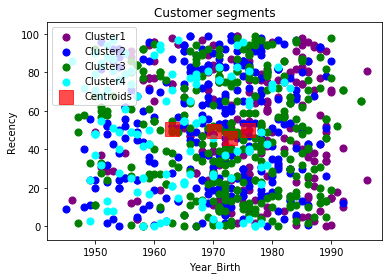

In [152]:
"""
------------------------------------------

Purchase profile -  Recency
------------------------------------------

"""

func_plot_cluster_k4(0,4)


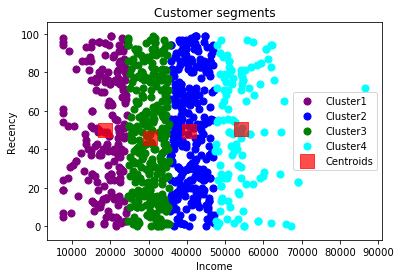

In [153]:
func_plot_cluster_k4(1,4)

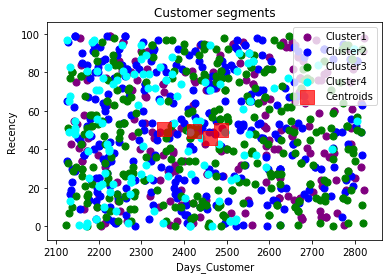

In [154]:
func_plot_cluster_k4(22,4)
# Not very easy to see

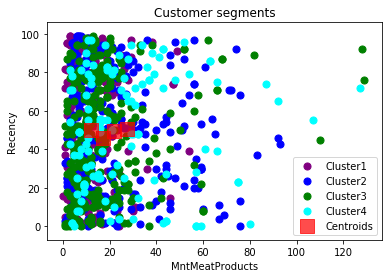

In [155]:
func_plot_cluster_k4(7,4)


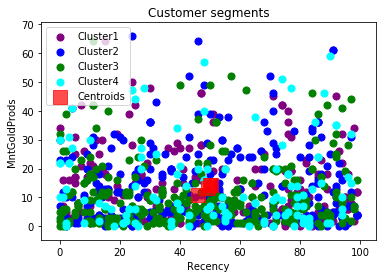

In [178]:
func_plot_cluster_k4(4,10)

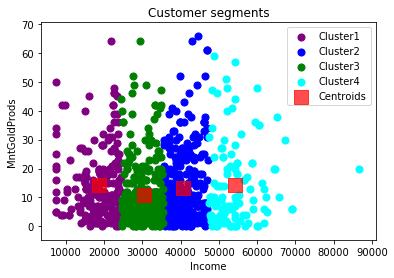

In [179]:
func_plot_cluster_k4(1,10)

In [ ]:
# Recency not a very good variable to define clusters


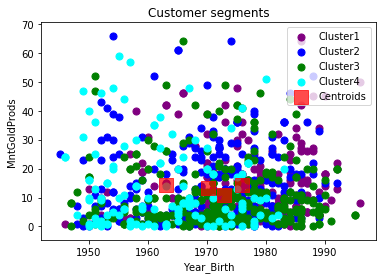

In [159]:
"""
------------------------------------------

Purchase profile -  products
------------------------------------------

"""

func_plot_cluster_k4(0,10)

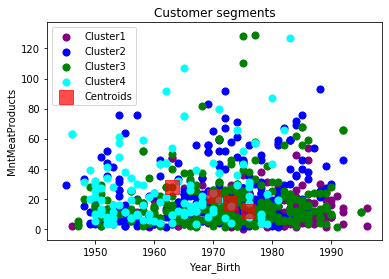

In [160]:
func_plot_cluster_k4(0,7)

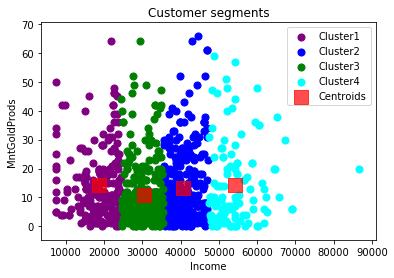

In [161]:
func_plot_cluster_k4(1,10)

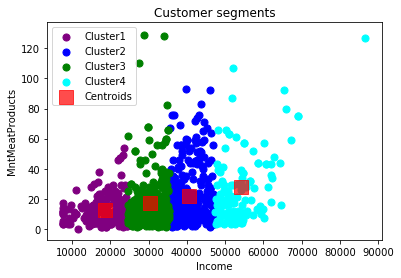

In [162]:
func_plot_cluster_k4(1,7)

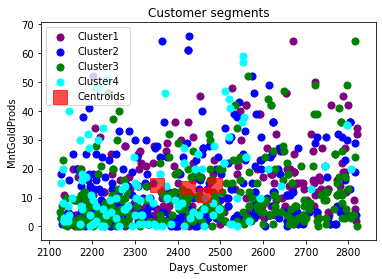

In [180]:
func_plot_cluster_k4(22,10)

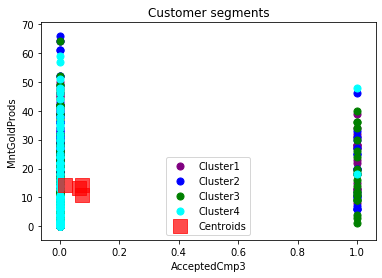

In [165]:
func_plot_cluster_k4(16,10)

In [166]:
for j in range (0,len(X_columns)):
    if X_columns[j] in X_feat_selec: 
        print("col %i   :  %s" %(j, X_columns[j])) 
        #X_feat_selec_index = X_feat_selec_index.append(j)
        
#X_feat_selec_index=[4,6,7,9,10,12,13,14,15,16,22]

col 4   :  Recency
col 6   :  MntFruits
col 7   :  MntMeatProducts
col 9   :  MntSweetProducts
col 10   :  MntGoldProds
col 12   :  NumWebPurchases
col 13   :  NumCatalogPurchases
col 14   :  NumStorePurchases
col 15   :  NumWebVisitsMonth
col 16   :  AcceptedCmp3
col 22   :  Days_Customer


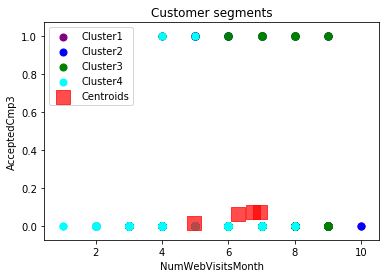

In [176]:
"""
------------------------------------------

Purchase profile - Comprou produto em campanha de mkt intermediária


------------------------------------------

"""
func_plot_cluster_k4(15,16)


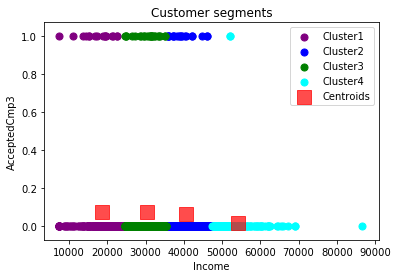

In [177]:
func_plot_cluster_k4(1,16)


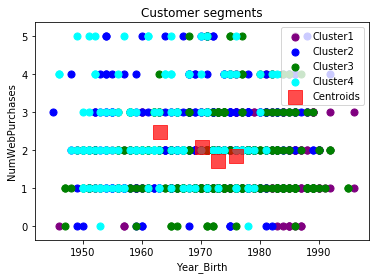

In [130]:
"""
------------------------------------------

Purchase profile - place


------------------------------------------

"""
func_plot_cluster_k4(0,12)


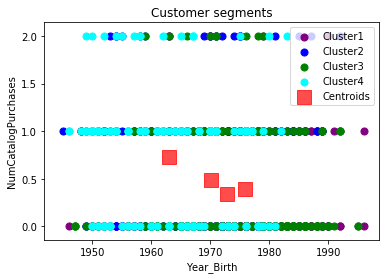

In [170]:
func_plot_cluster_k4(0,13)

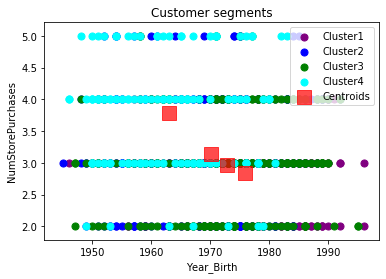

In [171]:
func_plot_cluster_k4(0,14)

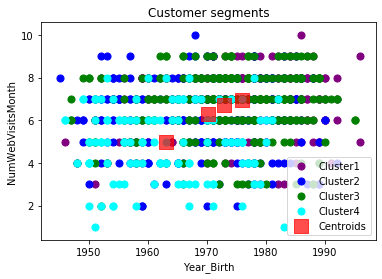

In [183]:
func_plot_cluster_k4(0,15)

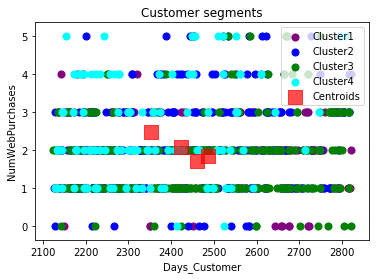

In [172]:
func_plot_cluster_k4(22,12)

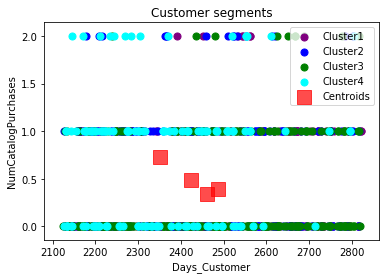

In [173]:
func_plot_cluster_k4(22,13)

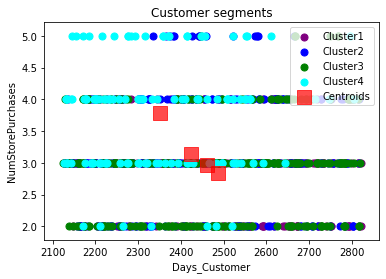

In [174]:
func_plot_cluster_k4(22,14)

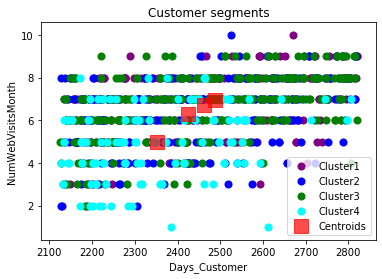

In [182]:
func_plot_cluster_k4(22,15)

In [ ]:
# Nao há distinção entre clusters usando essa variável

In [ ]:
"""

"""

In [ ]:
func_plot_cluster_k4(,22)

In [72]:
X_columns=X1.columns

for j in range (0,len(X_columns)):
    print("col %i   :  %s" %(j, X_columns[j])) 

col 0   :  Year_Birth
col 1   :  Income
col 2   :  Kidhome
col 3   :  Teenhome
col 4   :  Recency
col 5   :  MntWines
col 6   :  MntFruits
col 7   :  MntMeatProducts
col 8   :  MntFishProducts
col 9   :  MntSweetProducts
col 10   :  MntGoldProds
col 11   :  NumDealsPurchases
col 12   :  NumWebPurchases
col 13   :  NumCatalogPurchases
col 14   :  NumStorePurchases
col 15   :  NumWebVisitsMonth
col 16   :  AcceptedCmp3
col 17   :  AcceptedCmp4
col 18   :  AcceptedCmp5
col 19   :  AcceptedCmp1
col 20   :  AcceptedCmp2
col 21   :  Complain
col 22   :  Days_Customer
